### Analysis about US Billboard Top100 since 1960

The aim of this quick research was to see how social media and music platforms made tougher or easier for songs to hit Top100 and No1.  
My hypothesis was that a good song today supported by strong marketing should easily get into Top100, and should very quickly reach No1, but it may stay less on the board, since competition and music production is very high today.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
charts = pd.read_csv("Hot Stuff.csv")
charts.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,NaN,1,1
1,http://www.billboard.com/charts/hot-100/1995-1...,12/2/1995,1,One Sweet Day,Mariah Carey & Boyz II Men,One Sweet DayMariah Carey & Boyz II Men,1,NaN,1,1
2,http://www.billboard.com/charts/hot-100/1997-1...,10/11/1997,1,Candle In The Wind 1997/Something About The Wa...,Elton John,Candle In The Wind 1997/Something About The Wa...,1,NaN,1,1
3,http://www.billboard.com/charts/hot-100/2006-0...,7/1/2006,1,Do I Make You Proud,Taylor Hicks,Do I Make You ProudTaylor Hicks,1,NaN,1,1
4,http://www.billboard.com/charts/hot-100/2009-1...,10/24/2009,1,3,Britney Spears,3Britney Spears,1,NaN,1,1


In [3]:
charts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320495 entries, 0 to 320494
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   url                     320495 non-null  object 
 1   WeekID                  320495 non-null  object 
 2   Week Position           320495 non-null  int64  
 3   Song                    320495 non-null  object 
 4   Performer               320495 non-null  object 
 5   SongID                  320495 non-null  object 
 6   Instance                320495 non-null  int64  
 7   Previous Week Position  289711 non-null  float64
 8   Peak Position           320495 non-null  int64  
 9   Weeks on Chart          320495 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 24.5+ MB


Let's remove some unnecessary columns

In [4]:
charts.drop(columns=['url', 'Instance'], inplace=True)

Important element - change the type of WeekID to a Datetime type

In [5]:
charts['WeekID']= pd.to_datetime(charts['WeekID'])

In [6]:
charts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320495 entries, 0 to 320494
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   WeekID                  320495 non-null  datetime64[ns]
 1   Week Position           320495 non-null  int64         
 2   Song                    320495 non-null  object        
 3   Performer               320495 non-null  object        
 4   SongID                  320495 non-null  object        
 5   Previous Week Position  289711 non-null  float64       
 6   Peak Position           320495 non-null  int64         
 7   Weeks on Chart          320495 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 19.6+ MB


Let's still add the year and the decade to ease the research.    
Since the dataset starts in 1958 and we will mostly study it through decades, we will remove the lines related to the 50's

In [7]:
charts['Year'] = pd.DatetimeIndex(charts['WeekID']).year

In [8]:
def decade(year):
    if year < 1960 : 
        return "1950's"
    elif year <1970 : 
        return "1960's"
    elif year < 1980 :
        return "1970's"
    elif year < 1990 :
        return "1980's"
    elif year < 2000 :
        return "1990's"
    elif year < 2010 :
        return "2000's"
    else:
        return "2010's"

    
charts['Decade'] = charts['Year'].apply(decade)

In [9]:
charts.drop(charts[charts['Decade'] == "1950's"].index, inplace=True)

---------------------

Let's check the Performer column and create consequently the Performer ID. Since we believe there might be duets, featuring and similar musical collaborations, let's check carefully to end up with a proper performer list.  
For a song with multiple singers (duet type), we will duplicate the entries of the song to display in each line the different singers.  
For a song with a featuring, we will just create a new column called 'Featuring' that will display the featured artist(s).

In [10]:
performer = pd.DataFrame(charts['Performer'].unique())
performer.rename(columns = {0 : 'Performer'}, inplace=True)

Let's check the different words in the Performer list

In [11]:
performer["Performer Lower"] = performer["Performer"].str.lower()
perf_word = pd.DataFrame(performer['Performer Lower'].str.split(expand=True).stack().value_counts().head(50))
perf_word

,0
featuring,2071
the,1493
&,1283
and,346
lil,222
with,191
brown,123
wayne,116
band,114
chris,114


We can see from the list than we have  
- 2072 songs with featurings, 
- 1298 songs with two artists ('&' sign), 
- 382 with 'and' in artist name, 
- 204 with 'with' 
- and 50 with 'x' sign which can be interpreted as duet as well. Let's check in deep this last one, just to be sure

In [12]:
performer[performer['Performer Lower'].str.contains(" x ")]

,Performer,Performer Lower
559,Lil Nas X & Cardi B,lil nas x & cardi b
604,XXXTENTACION x Lil Pump Featuring Maluma & Swa...,xxxtentacion x lil pump featuring maluma & swa...
639,"Lil Wayne, Wiz Khalifa & Imagine Dragons With ...","lil wayne, wiz khalifa & imagine dragons with ..."
702,Machine Gun Kelly x Camila Cabello,machine gun kelly x camila cabello
1383,Pedro Capo X Farruko,pedro capo x farruko
2589,Ellie Goulding X Diplo Featuring Swae Lee,ellie goulding x diplo featuring swae lee
2819,Linkin Park X Steve Aoki,linkin park x steve aoki
2822,Nicki Minaj X Mike WiLL Made-It,nicki minaj x mike will made-it
2870,SOB X RBE,sob x rbe
2901,Ozuna x Daddy Yankee x J Balvin x Farruko x An...,ozuna x daddy yankee x j balvin x farruko x an...


Except two artists which include a single x in their own name (lil nas x and x ambassadors), all others single 'x' are for duets songs. Let's change in the main dataframe 'charts', this 'x' por '&' to ease the research (without changing the name of the two artists mentionned above) and create a 'Collaboration' column in the dataset to keep a trace.  
We have also the key word 'Orchestra' (exact expression is "And His Orchestra"). To avoid future misunderstandings, we will concactenate this expression.

In [13]:
charts['Performer'] = charts['Performer'].str.replace('Lil Nas X','Lil NasX')
charts['Performer'] = charts['Performer'].str.replace('X Ambassadors','XAmbassadors')
charts['Performer'] = charts['Performer'].str.replace(' x ',' & ')
charts['Performer'] = charts['Performer'].str.replace(' X ',' & ')
charts['Performer'] = charts['Performer'].str.replace(' and ',' & ')
charts['Performer'] = charts['Performer'].str.replace(' And ',' & ')
charts['Performer'] = charts['Performer'].str.replace(' AND ',' & ')
charts['Performer'] = charts['Performer'].str.replace(' With ',' & ')
charts['Performer'] = charts['Performer'].str.replace(' with ',' & ')
charts['Performer'] = charts['Performer'].str.replace(' feat ',' Featuring ')
charts['Performer'] = charts['Performer'].str.replace(' feat. ',' Featuring ')
charts['Performer'] = charts['Performer'].str.replace(' featuring ',' Featuring ')
charts['Performer'] = charts['Performer'].str.replace('& His Orchestra','And_His_Orchestra')

In [14]:
def collab(string):
    if "Featuring" in string:
        return "Featuring"
    elif " & " in string:
        return "Duet"
    else:
        return "Solo"

    
charts['Collaboration'] = charts['Performer'].apply(collab)

We will now manage Duets and Featuring differently. For Duets, since the two artists have the same importance, we will duplicate song entries to get represented the two artists in the Performer column individually.
For Featurings, we will create a Featuring artist column, just to keep a trace.

In [15]:
#First the Duets - Let's separate the two artists (more will be disregarded)

charts[['First Duet Artist','Second Duet Artist']] = charts['Performer'].str.split(' & ',expand=True).iloc[:, :2]
charts['Second Duet Artist'].fillna(value=np.nan, inplace=True)

In [16]:
#let's get a subset of the Dataset with just the Duet Entries to manage the melt

duets_df = charts[charts['Collaboration'] == 'Duet']

In [17]:
duets_melt = duets_df.melt(id_vars=['WeekID', 'Week Position','Song', 'Performer','SongID', 
                                   'Previous Week Position', 'Peak Position', 'Weeks on Chart',
                                   'Year', 'Decade', 'Collaboration' ], 
                           value_vars=['First Duet Artist','Second Duet Artist'], var_name='Artist Type')


In [18]:
duets_melt.drop(columns='Artist Type', inplace=True)
duets_melt.rename(columns={'value' : 'Singer'}, inplace=True)

In [19]:
duets_melt

,WeekID,Week Position,Song,Performer,SongID,Previous Week Position,Peak Position,Weeks on Chart,Year,Decade,Collaboration,Singer
0,1995-12-02,1,One Sweet Day,Mariah Carey & Boyz II Men,One Sweet DayMariah Carey & Boyz II Men,NaN,1,1,1995,1990's,Duet,Mariah Carey
1,2019-07-06,2,Senorita,Shawn Mendes & Camila Cabello,SenoritaShawn Mendes & Camila Cabello,NaN,2,1,2019,2010's,Duet,Shawn Mendes
2,2019-10-19,4,"10,000 Hours",Dan + Shay & Justin Bieber,"10,000 HoursDan + Shay & Justin Bieber",NaN,4,1,2019,2010's,Duet,Dan + Shay
3,1995-06-17,5,Scream/Childhood,Michael Jackson & Janet Jackson,Scream/ChildhoodMichael Jackson & Janet Jackson,NaN,5,1,1995,1990's,Duet,Michael Jackson
4,2019-03-02,5,Please Me,Cardi B & Bruno Mars,Please MeCardi B & Bruno Mars,NaN,5,1,2019,2010's,Duet,Cardi B
...,...,...,...,...,...,...,...,...,...,...,...,...
52269,2019-04-13,85,Lovely,Billie Eilish & Khalid,LovelyBillie Eilish & Khalid,96.0,85,22,2019,2010's,Duet,Khalid
52270,2019-01-12,62,Electricity,Silk City & Dua Lipa,ElectricitySilk City x Dua Lipa,NaN,62,7,2019,2010's,Duet,Dua Lipa
52271,2019-01-19,62,Electricity,Silk City & Dua Lipa,ElectricitySilk City x Dua Lipa,62.0,62,8,2019,2010's,Duet,Dua Lipa
52272,2019-01-26,68,Electricity,Silk City & Dua Lipa,ElectricitySilk City x Dua Lipa,62.0,62,9,2019,2010's,Duet,Dua Lipa


In [20]:
#Let's re-merge with the main dataset (with previous Duets songs expelled)

all_but_duets_df = charts[charts['Collaboration'] != 'Duet']
all_but_duets_df.drop(columns='Second Duet Artist', inplace=True)
all_but_duets_df.rename(columns = {'First Duet Artist' : 'Singer'}, inplace=True)

In [21]:
charts = pd.merge(all_but_duets_df, duets_melt, 
                  how='outer', 
                  on = ['WeekID', 'Week Position','Song', 'Performer','SongID', 
                                   'Previous Week Position', 'Peak Position', 'Weeks on Chart',
                                   'Year', 'Decade', 'Collaboration', 'Singer'])

In [22]:
charts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339232 entries, 0 to 339231
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   WeekID                  339232 non-null  datetime64[ns]
 1   Week Position           339232 non-null  int64         
 2   Song                    339232 non-null  object        
 3   Performer               339232 non-null  object        
 4   SongID                  339232 non-null  object        
 5   Previous Week Position  306708 non-null  float64       
 6   Peak Position           339232 non-null  int64         
 7   Weeks on Chart          339232 non-null  int64         
 8   Year                    339232 non-null  int64         
 9   Decade                  339232 non-null  object        
 10  Collaboration           339232 non-null  object        
 11  Singer                  339232 non-null  object        
dtypes: datetime64[ns](1), float64(

In [23]:
# Let's get the featuring now. We will just add a column with 'Featured Singers' for the songs which have featured artists.

charts[['Singer','Featured Singers']] = charts['Singer'].str.split(' Featuring ',expand=True)
charts['Featured Singers'].fillna(value=np.nan, inplace=True)


In [24]:
#We can now finally proceed with the Singer ID following the Singer column

performer = pd.DataFrame(charts['Singer'].unique())
performer.rename(columns = {0 : 'Singer'}, inplace=True)
performer['Singer ID'] = performer.index
performer.head(10)

,Singer,Singer ID
0,Elton John,0
1,Taylor Hicks,1
2,Britney Spears,2
3,Lady Gaga,3
4,Katy Perry,4
5,Taylor Swift,5
6,Zayn,6
7,Justin Timberlake,7
8,Ed Sheeran,8
9,Ariana Grande,9


In [25]:
charts = pd.merge(charts, performer, on = 'Singer')
charts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339232 entries, 0 to 339231
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   WeekID                  339232 non-null  datetime64[ns]
 1   Week Position           339232 non-null  int64         
 2   Song                    339232 non-null  object        
 3   Performer               339232 non-null  object        
 4   SongID                  339232 non-null  object        
 5   Previous Week Position  306708 non-null  float64       
 6   Peak Position           339232 non-null  int64         
 7   Weeks on Chart          339232 non-null  int64         
 8   Year                    339232 non-null  int64         
 9   Decade                  339232 non-null  object        
 10  Collaboration           339232 non-null  object        
 11  Singer                  339232 non-null  object        
 12  Featured Singers        28423 

---------------------

We have now a complete dataset to work with. Let's just re-arrange the columns. (NB: we keep Performer column just in case)

In [26]:
charts = charts[['WeekID','Song','SongID','Singer','Singer ID', 'Collaboration', 'Featured Singers',
                'Peak Position', 'Week Position','Previous Week Position', 'Weeks on Chart', 'Year', 'Decade', 'Performer']]

In [27]:
charts.head()

,WeekID,Song,SongID,Singer,Singer ID,Collaboration,Featured Singers,Peak Position,Week Position,Previous Week Position,Weeks on Chart,Year,Decade,Performer
0,1997-10-11,Candle In The Wind 1997/Something About The Wa...,Candle In The Wind 1997/Something About The Wa...,Elton John,0,Solo,NaN,1,1,NaN,1,1997,1990's,Elton John
1,1973-09-22,Saturday Night's Alright For Fighting,Saturday Night's Alright For FightingElton John,Elton John,0,Solo,NaN,12,12,12.0,8,1973,1970's,Elton John
2,1988-11-26,A Word In Spanish,A Word In SpanishElton John,Elton John,0,Solo,NaN,19,41,20.0,11,1988,1980's,Elton John
3,1973-10-13,Saturday Night's Alright For Fighting,Saturday Night's Alright For FightingElton John,Elton John,0,Solo,NaN,12,42,24.0,11,1973,1970's,Elton John
4,1987-12-26,Candle In The Wind,Candle In The WindElton John,Elton John,0,Solo,NaN,13,13,18.0,8,1987,1980's,Elton John


Let's see an example of a ranking evolution : Song 'Vogue' by Madonna (1990)

In [28]:
madonna = charts[charts['Song'] == 'Vogue'].sort_values('WeekID', ascending=True)

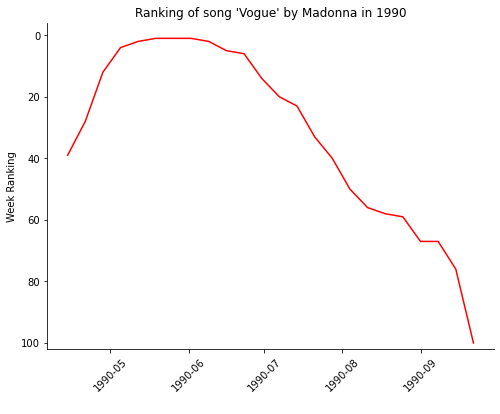

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6));
sns.lineplot(x="WeekID", y="Week Position", data=madonna, color='r')
plt.ylim(102, madonna['Week Position'].min()-5);
plt.xticks(rotation=45);
plt.xlabel(" ")
plt.ylabel("Week Ranking")
plt.title("Ranking of song 'Vogue' by Madonna in 1990")
sns.despine();


We can check aslo the rankings of several songs from a same singer. Let's try with Lady Gaga

In [30]:
lady = charts[charts['Singer'] == 'Lady Gaga'].sort_values('WeekID', ascending=True)

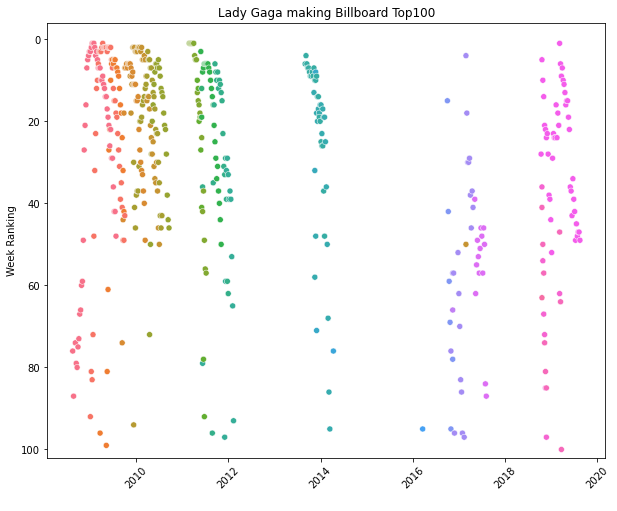

In [31]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x="WeekID", y="Week Position", hue='Song', data=lady)
plt.ylim(102, lady['Week Position'].min()-5);
plt.xticks(rotation=45);
plt.xlabel(" ")
plt.ylabel("Week Ranking")
ax.get_legend().remove()
plt.title("Lady Gaga making Billboard Top100");

______________________

## Let's start the analysis itself

First of all, let's check how many songs and how many artists made up to the Top100 each decades

In [32]:
song_per_decade = pd.DataFrame(charts.groupby('Decade')['SongID'].nunique())
performer_per_decade = pd.DataFrame(charts.groupby('Decade')['Singer ID'].nunique())

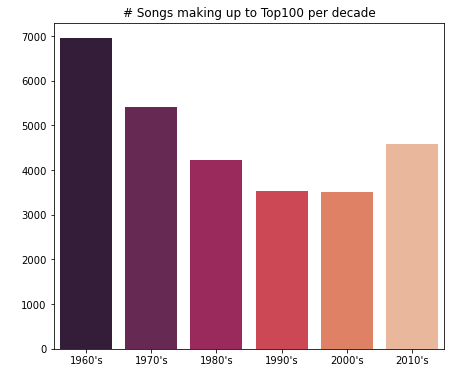

In [33]:
plt.figure(figsize=(7,6));
sns.barplot(x=song_per_decade.index, y=song_per_decade['SongID'], palette="rocket");
plt.title("# Songs making up to Top100 per decade")
plt.xlabel(" ")
plt.ylabel(" ");

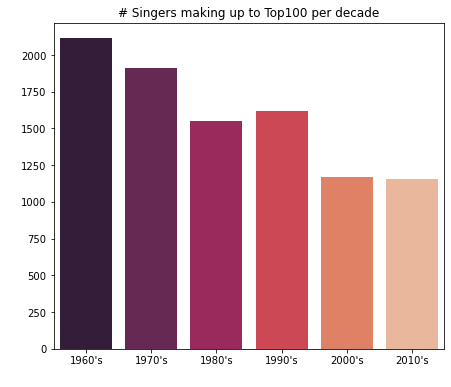

In [34]:
plt.figure(figsize=(7,6));
sns.barplot(x=performer_per_decade.index, y=performer_per_decade['Singer ID'], palette="rocket");
plt.title("# Singers making up to Top100 per decade")
plt.xlabel(" ")
plt.ylabel(" ");

From such graphics, we can deduct various elements :
    - we can see that from the 60's up to the years 2000, every year, less and less songs were made to enter Top100, which can make us think that mainstream media tend to push a limited number of songs.
    - But 2010's years, with the use maybe of social media, streaming platforms, and youtube, more songs have their chances. 
    - On the numbers of artists making to Top100, there is a strong decrease in # of artists represented in the top100, which is in opposite of the songs making up to the Top100.
   > So, more songs from less artists in the 2010's decade

Let's check the ratio

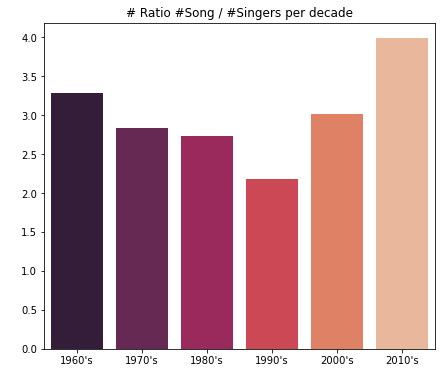

In [35]:
ratio = pd.merge(song_per_decade, performer_per_decade,left_index=True, right_index=True)
ratio['Ratio'] = ratio['SongID'] / ratio['Singer ID']

plt.figure(figsize=(7,6));
sns.barplot(x=ratio.index, y=ratio['Ratio'], palette="rocket");
plt.title("# Ratio #Song / #Singers per decade")
plt.xlabel(" ")
plt.ylabel(" ");

Let's see which singers put the most on Top100 over the period and per decade

In [38]:
first_singers = pd.DataFrame(charts.groupby('Singer')['SongID'].nunique().sort_values(ascending=False).head(20))
first_singers.reset_index(inplace=True)
first_singers.rename(columns={'SongID' : 'Count'}, inplace=True)

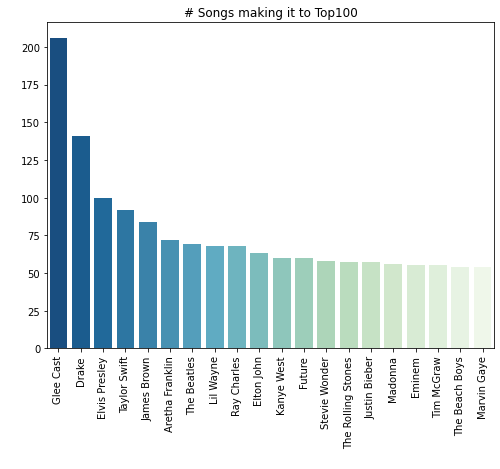

In [39]:
plt.figure(figsize=(8,6));
sns.barplot(first_singers['Singer'], first_singers['Count'], palette="GnBu_r")
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.ylabel(" ")
plt.title("# Songs making it to Top100");

In [40]:
first_per_decade = pd.DataFrame(charts.groupby(['Decade','Singer'])['SongID'].nunique())
first_per_decade.reset_index(inplace=True)
first_per_decade

,Decade,Singer,SongID
0,1960's,"""Groove"" Holmes",2
1,1960's,"""Little"" Jimmy Dickens",1
2,1960's,"""Pookie"" Hudson",1
3,1960's,100 Proof Aged in Soul,1
4,1960's,100 Strings,1
...,...,...,...
9506,2010's,k.d. lang,1
9507,2010's,lovelytheband,1
9508,2010's,matchbox twenty,1
9509,2010's,twenty one pilots,9


In [41]:
first_per_decade_1960 = first_per_decade[first_per_decade['Decade'] == "1960's"].sort_values('SongID', ascending = False).head(5)
first_per_decade_1970 = first_per_decade[first_per_decade['Decade'] == "1970's"].sort_values('SongID', ascending = False).head(5)
first_per_decade_1980 = first_per_decade[first_per_decade['Decade'] == "1980's"].sort_values('SongID', ascending = False).head(5)
first_per_decade_1990 = first_per_decade[first_per_decade['Decade'] == "1990's"].sort_values('SongID', ascending = False).head(5)
first_per_decade_2000 = first_per_decade[first_per_decade['Decade'] == "2000's"].sort_values('SongID', ascending = False).head(5)
first_per_decade_2010 = first_per_decade[first_per_decade['Decade'] == "2010's"].sort_values('SongID', ascending = False).head(5)

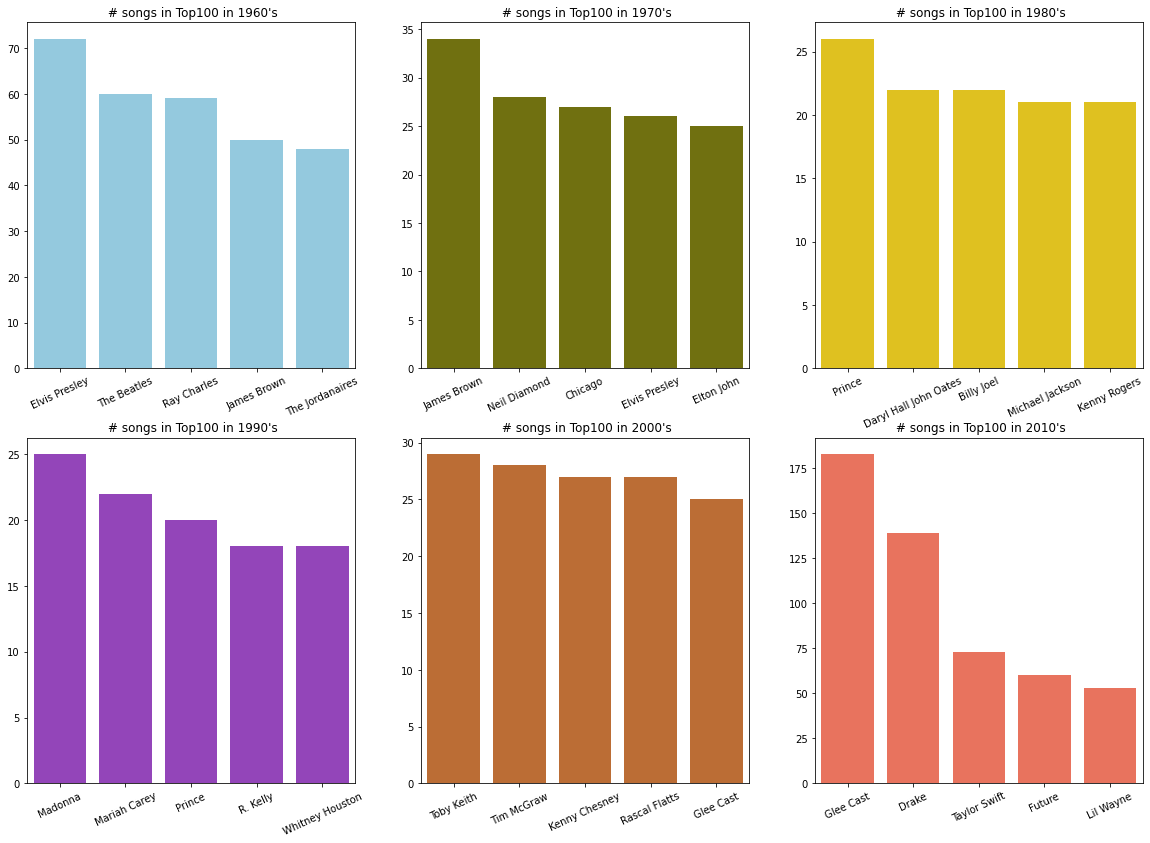

In [42]:
f, axes = plt.subplots(2, 3, figsize=(20,14))

ax1 = sns.barplot(first_per_decade_1960["Singer"] , first_per_decade_1960["SongID"], color="skyblue", ax=axes[0, 0])
ax1.set_title(" # songs in Top100 in 1960's")
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=25)

ax2 = sns.barplot(first_per_decade_1970["Singer"] , first_per_decade_1970["SongID"], color="olive", ax=axes[0, 1])
ax2.set_title(" # songs in Top100 in 1970's")
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=25)

ax3 = sns.barplot(first_per_decade_1980["Singer"] , first_per_decade_1980["SongID"], color="gold", ax=axes[0, 2])
ax3.set_title(" # songs in Top100 in 1980's")
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=25)

ax4 = sns.barplot(first_per_decade_1990["Singer"] , first_per_decade_1990["SongID"], color="darkorchid", ax=axes[1, 0]);
ax4.set_title(" # songs in Top100 in 1990's")
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=25)

ax5 = sns.barplot(first_per_decade_2000["Singer"] , first_per_decade_2000["SongID"], color="chocolate", ax=axes[1, 1]);
ax5.set_title(" # songs in Top100 in 2000's")
ax5.set_xlabel('')
ax5.set_ylabel('')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=25)

ax6 = sns.barplot(first_per_decade_2010["Singer"] , first_per_decade_2010["SongID"], color="tomato", ax=axes[1, 2]);
ax6.set_title(" # songs in Top100 in 2010's")
ax6.set_xlabel('')
ax6.set_ylabel('')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=25);

Just for fun, let's check how many songs a singer put on Top100 per decade

In [45]:
topsongs = pd.DataFrame(charts.groupby(['Decade','Singer ID'])['SongID'].nunique())
topsongs.reset_index(inplace=True)

In [46]:
topsongs.groupby('Decade').describe()

Singer ID                                                           \
           count         mean          std   min     25%     50%      75%   
Decade                                                                      
1960's    2115.0  4349.623168  2169.979781  56.0  2739.0  4587.0  6251.50   
1970's    1909.0  3824.247774  2195.082627   0.0  1873.0  3880.0  5734.00   
1980's    1549.0  3359.352485  2180.455167   0.0  1439.0  3177.0  4967.00   
1990's    1617.0  3136.820037  2204.941729   0.0  1182.0  2600.0  4860.00   
2000's    1168.0  2679.187500  2169.553386   0.0   808.5  2134.5  4432.25   
2010's    1153.0  3148.610581  2453.973948   2.0   875.0  2514.0  5623.00   

                SongID                                                 
           max   count      mean       std  min  25%  50%  75%    max  
Decade                                                                 
1960's  7699.0  2115.0  3.796690  6.000969  1.0  1.0  2.0  4.0   72.0  
1970's  7697.0  1909.0  3.117863  3.915678  1.0  1.0  1.0  3.0   34.0  
1980's  7689.0  1549.0  2.936733  3.476369  1.0  1.0  1.0  3.0   26.0  
1990's  7700.0  1617.0  2.297464  2.433512  1.0  1.0  1.0  3.0   25.0  
2000's  7692.0  1168.0  3.132705  3.919983  1.0  1.0  2.0  3.0   29.0  
2010's  7687.0  1153.0  4.266262  9.388937  1.0  1.0  1.0  4.0  183.0

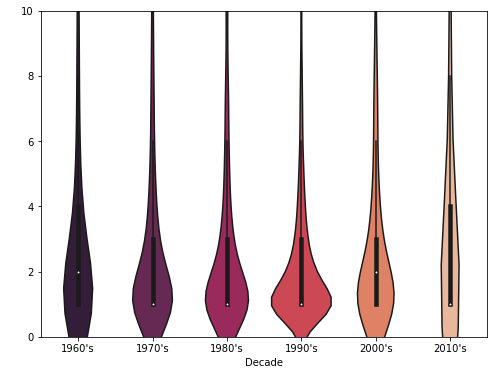

In [47]:
plt.figure(figsize=(8,6));
sns.violinplot(x='Decade', y='SongID', data=topsongs, showfliers = False, palette="rocket");
plt.ylim(0,10)
plt.ylabel(" ");

We have a big outlier in 2010's decade since TV show Glee put 183 different songs on Top100. The power of TV...

---------------------------

Since we worked a lot to distinguish single singers from duets and featurings, let's see the count for every decades

In [48]:
collab_df = pd.DataFrame(charts.groupby(['Decade','Collaboration'])['SongID'].nunique())
collab_df.reset_index(inplace=True)

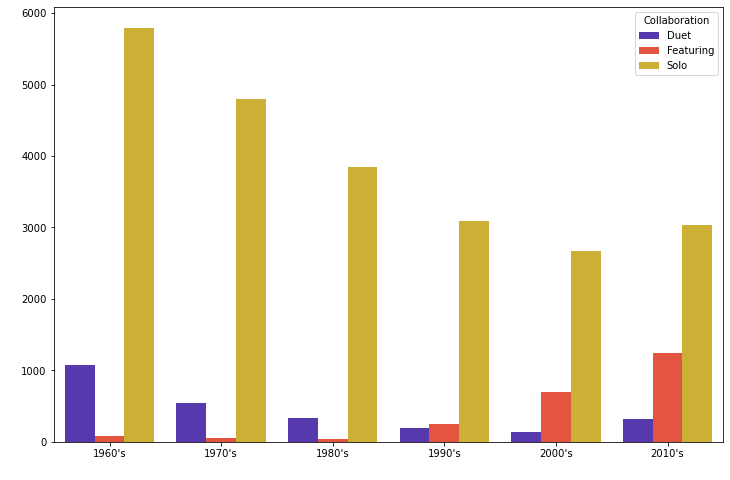

In [49]:
plt.figure(figsize=(12,8))

sns.barplot(data=collab_df,
           x='Decade',
           y='SongID',
           hue='Collaboration',
           palette='CMRmap');
plt.ylabel(" ");
plt.xlabel(" ");

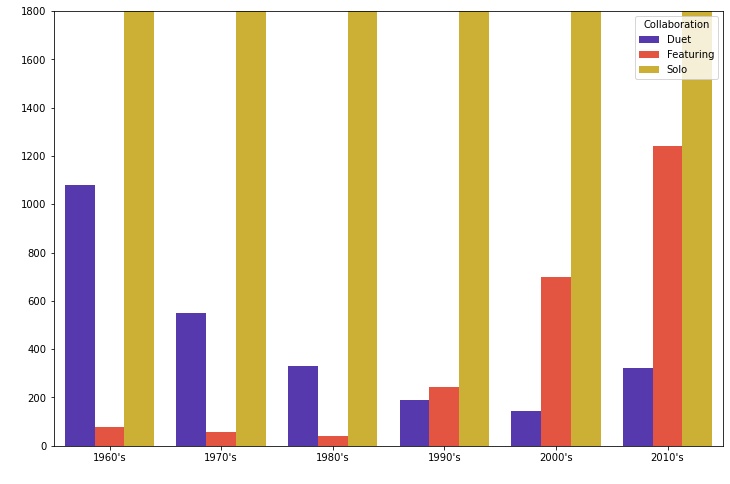

In [50]:
plt.figure(figsize=(12,8))

plt.ylim(0,1800)

sns.barplot(data=collab_df,
           x='Decade',
           y='SongID',
           hue='Collaboration',
           palette='CMRmap');
plt.ylabel(" ");
plt.xlabel(" ");

In [51]:
new_collab = collab_df.groupby(['Decade', 'Collaboration'])['SongID'].aggregate('sum').unstack()
new_collab

Collaboration,Duet,Featuring,Solo
Decade,,,
1960's,1079,78,5797
1970's,548,58,4798
1980's,330,39,3852
1990's,189,243,3094
2000's,143,698,2675
2010's,324,1240,3032


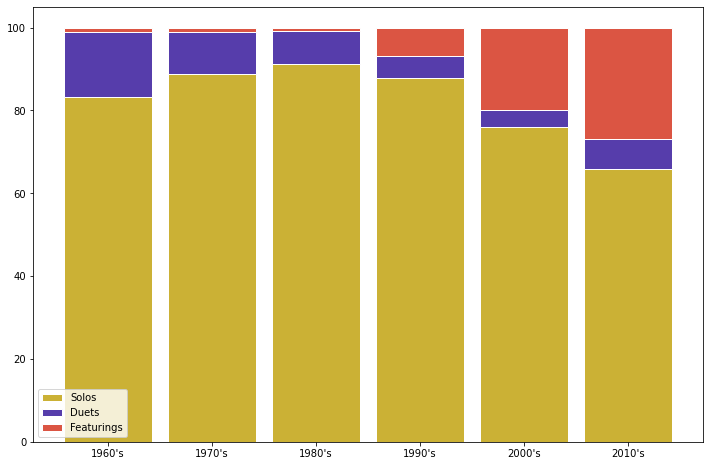

In [52]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

plt.figure(figsize=(12,8))

# Data
r = [0,1,2,3,4,5]


# From raw value to percentage
totals = [i+j+k for i,j,k in zip(new_collab['Solo'], new_collab['Duet'], new_collab['Featuring'])]
solos = [i / j * 100 for i,j in zip(new_collab['Solo'], totals)]
duets = [i / j * 100 for i,j in zip(new_collab['Duet'], totals)]
featurings = [i / j * 100 for i,j in zip(new_collab['Featuring'], totals)]
 
# plot
barWidth = 0.85
names = new_collab.index

# Create green Bars
plt.bar(r, solos, color='#cbb135', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, duets, bottom=solos, color='#563dab', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, featurings, bottom=[i+j for i,j in zip(solos, duets)], color='#db5543', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)

plt.legend(['Solos', 'Duets', 'Featurings'], loc='lower left')

# Show graphic
plt.show()
 



In the 2000's and 2010's, let's check which main singer made the most featuring, and which artist has been the most featured artists

In [53]:
feat_singers = charts[(charts['Collaboration'] == 'Featuring') 
               & ((charts['Decade'] == "2010's") 
                  | (charts['Decade'] == "2000's"))][['Singer','SongID']].drop_duplicates()
feat_singers['Singer'].value_counts().head(10)

Drake          39
Lil Wayne      34
DJ Khaled      31
Meek Mill      24
Kanye West     24
Glee Cast      23
Chris Brown    21
Pitbull        21
Eminem         18
Nicki Minaj    17
Name: Singer, dtype: int64

In [54]:
feat_artists = charts[(charts['Collaboration'] == 'Featuring') 
               & ((charts['Decade'] == "2010's") 
                  | (charts['Decade'] == "2000's"))][['Featured Singers','SongID']].drop_duplicates()
feat_artists['Featured Singers'].value_counts().head(10)

Lil Wayne       57
Drake           53
Nicki Minaj     45
Chris Brown     37
Kanye West      29
T-Pain          22
Ludacris        20
Future          20
Travis Scott    15
Snoop Dogg      15
Name: Featured Singers, dtype: int64

--------------------------

Let's check now how many weeks a song stays in the Top100, in average, per year and per decade

In [56]:
week_average = pd.DataFrame(charts.groupby(['Year','SongID'])['Weeks on Chart'].max())
week_average.columns = ['Weeks on chart max']
week_average = week_average.reset_index()
week_average = pd.DataFrame(week_average.groupby('Year')['Weeks on chart max'].mean())
week_average.head()

,Weeks on chart max
Year,
1960,8.455714
1961,7.445443
1962,7.731771
1963,7.554377
1964,7.057953


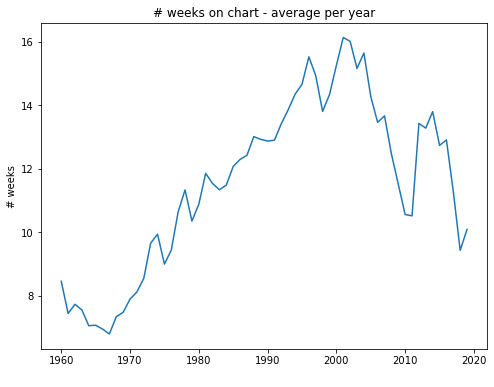

In [57]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Year", y="Weeks on chart max", data=week_average)
plt.xlabel(" ")
plt.ylabel("# weeks")
plt.title("# weeks on chart - average per year");

-----------------------------

## No1 Songs

Let's focus now on Top1. A few statistics first

In [58]:
charts[charts['Peak Position'] == 1]['SongID'].nunique()

1076

1076 songs made up to No1 in all music history

In [60]:
charts['SongID'].nunique()
charts[charts['Peak Position'] == 1]['SongID'].nunique() / charts['SongID'].nunique() * 100

3.890797324172844

Which means about 4% of the songs

In [61]:
charts[charts['Peak Position'] == 1]['Singer ID'].nunique()

696

About 700 singers made up to the No1 position. Let's check with artists did the most as No1

In [62]:
charts[charts['Peak Position'] == 1].groupby('Singer')['SongID'].nunique().sort_values(ascending=False).head(10)

Singer
The Beatles        20
Mariah Carey       19
Michael Jackson    13
The Supremes       12
Madonna            12
Whitney Houston    11
Rihanna            11
Bee Gees            9
Usher               9
Katy Perry          9
Name: SongID, dtype: int64

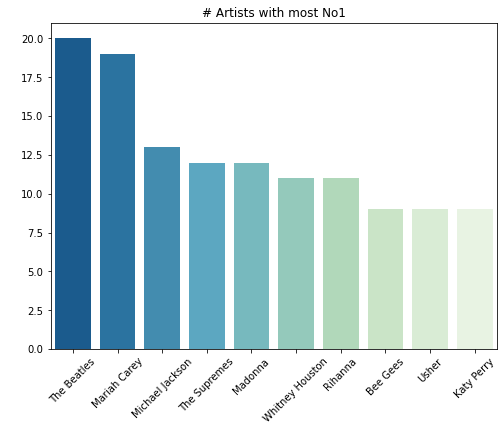

In [72]:
top=pd.DataFrame(charts[charts['Peak Position'] == 1].groupby('Singer')['SongID'].nunique().sort_values(ascending=False).head(10))
top.reset_index(inplace=True)
plt.figure(figsize=(8,6));
sns.barplot(top['Singer'], top['SongID'], palette="GnBu_r")
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.ylabel(" ")
plt.title("# Artists with most No1");

Let's check how many songs hit No1 per decade

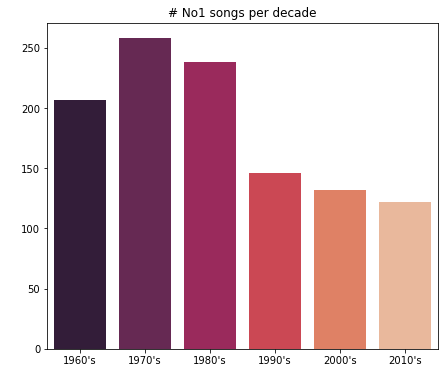

In [73]:
plt.figure(figsize=(7,6));
sns.barplot(charts[charts['Peak Position'] == 1].groupby('Decade')['SongID'].nunique().index, charts[charts['Peak Position'] == 1].groupby('Decade')['SongID'].nunique(), palette="rocket");
plt.title("# No1 songs per decade")
plt.xlabel(" ")
plt.ylabel(" ");

And per year

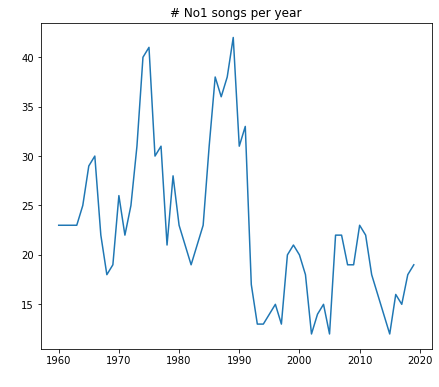

In [74]:
plt.figure(figsize=(7,6));
sns.lineplot(charts[charts['Peak Position'] == 1].groupby('Year')['SongID'].nunique().index, charts[charts['Peak Position'] == 1].groupby('Year')['SongID'].nunique(), palette="rocket");
plt.title("# No1 songs per year")
plt.xlabel(" ")
plt.ylabel(" ");

Much more No1 in the 70's and the 80's (despite less songs entering Top100)than others decades.  
Current modern times show a very limited numbers of No1 songs (last lowest is 12 songs in 2015)

---------------------------

I would be interesting to see what has been the first position a future No1 song entered the top100, to understand whether or not it gets quicker now with social medias and streaming platforms

In [77]:
songsNo1 = charts[charts['Peak Position'] == 1]['SongID'].drop_duplicates()

In [78]:
songsNo1 = charts[charts['SongID'].isin(songsNo1)][['SongID','Previous Week Position','Week Position', 'Weeks on Chart','Decade', 'Year']]

In [79]:
songsNo1_2 = songsNo1[songsNo1['Previous Week Position'].isnull()]

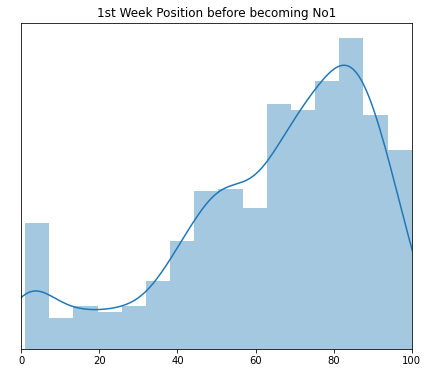

In [82]:
plt.figure(figsize=(7,6));
sns.distplot(x=songsNo1_2["Week Position"])
plt.xlim(0,100)
plt.xlabel('1st Week Position before becoming No1')
plt.title('1st Week Position before becoming No1')
plt.yticks([])
plt.ylabel(' ')
plt.xlabel(' ');

In [83]:
songsNo1_1960 = songsNo1_2[songsNo1_2['Decade'] == "1960's"]
songsNo1_1970 = songsNo1_2[songsNo1_2['Decade'] == "1970's"]
songsNo1_1980 = songsNo1_2[songsNo1_2['Decade'] == "1980's"]
songsNo1_1990 = songsNo1_2[songsNo1_2['Decade'] == "1990's"]
songsNo1_2000 = songsNo1_2[songsNo1_2['Decade'] == "2000's"]
songsNo1_2010 = songsNo1_2[songsNo1_2['Decade'] == "2010's"]

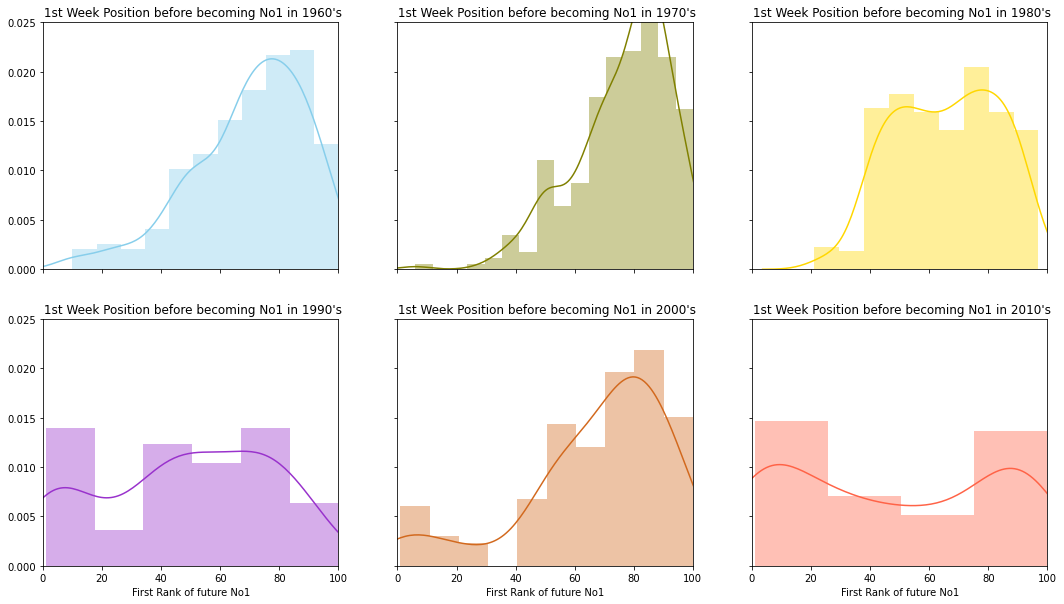

In [86]:
f, axes = plt.subplots(2, 3, figsize=(18,10), sharex=True, sharey=True)

plt.xlim(0,100)
plt.ylim(0,0.025)

ax1 = sns.distplot(songsNo1_1960["Week Position"] , color="skyblue", ax=axes[0, 0])
ax2= sns.distplot(songsNo1_1970["Week Position"] , color="olive", ax=axes[0, 1])
ax3 = sns.distplot(songsNo1_1980["Week Position"] , color="gold", ax=axes[0, 2])
ax4= sns.distplot(songsNo1_1990["Week Position"] , color="darkorchid", ax=axes[1, 0]);
ax5 = sns.distplot(songsNo1_2000["Week Position"] , color="chocolate", ax=axes[1, 1]);
ax6 = sns.distplot(songsNo1_2010["Week Position"] , color="tomato", ax=axes[1, 2]);

ax1.set_title(" 1st Week Position before becoming No1 in 1960's")
ax2.set_title(" 1st Week Position before becoming No1 in 1970's")
ax3.set_title(" 1st Week Position before becoming No1 in 1980's")
ax4.set_title(" 1st Week Position before becoming No1 in 1990's")
ax5.set_title(" 1st Week Position before becoming No1 in 2000's")
ax6.set_title(" 1st Week Position before becoming No1 in 2010's")
ax4.set_xlabel('First Rank of future No1')
ax1.set_ylabel('')
ax5.set_xlabel('First Rank of future No1')
ax6.set_xlabel('First Rank of future No1')
ax4.set_ylabel('');

How many weeks are needed in average to get No1 ?

In [87]:
songsNo1.sort_values(['SongID','Weeks on Chart'])

,SongID,Previous Week Position,Week Position,Weeks on Chart,Decade,Year
128961,(Can't Live Without Your) Love And AffectionNe...,NaN,93,1,1990's,1990
128984,(Can't Live Without Your) Love And AffectionNe...,93.0,80,2,1990's,1990
128994,(Can't Live Without Your) Love And AffectionNe...,80.0,63,3,1990's,1990
129004,(Can't Live Without Your) Love And AffectionNe...,63.0,54,4,1990's,1990
129009,(Can't Live Without Your) Love And AffectionNe...,54.0,43,5,1990's,1990
...,...,...,...,...,...,...
241487,You've Lost That Lovin' Feelin'The Righteous B...,2.0,2,12,1960's,1965
241488,You've Lost That Lovin' Feelin'The Righteous B...,2.0,3,13,1960's,1965
241489,You've Lost That Lovin' Feelin'The Righteous B...,3.0,12,14,1960's,1965
241490,You've Lost That Lovin' Feelin'The Righteous B...,12.0,15,15,1960's,1965


In [88]:
how_long = songsNo1[songsNo1['Week Position'] == 1][['SongID','Weeks on Chart', 'Decade']]
how_long.groupby('SongID')['Weeks on Chart'].min()

SongID
(Can't Live Without Your) Love And AffectionNelson                           13
(Everything I Do) I Do It For YouBryan Adams                                  5
(Hey Won't You Play) Another Somebody Done Somebody Wrong SongB.J. Thomas    13
(I Can't Get No) SatisfactionThe Rolling Stones                               5
(I Just) Died In Your ArmsCutting Crew                                        9
                                                                             ..
You're SixteenRingo Starr                                                     7
You're So VainCarly Simon                                                     6
You're The One That I WantJohn Travolta & Olivia Newton-John                 11
You've Got A FriendJames Taylor                                               9
You've Lost That Lovin' Feelin'The Righteous Brothers                         9
Name: Weeks on Chart, Length: 1072, dtype: int64

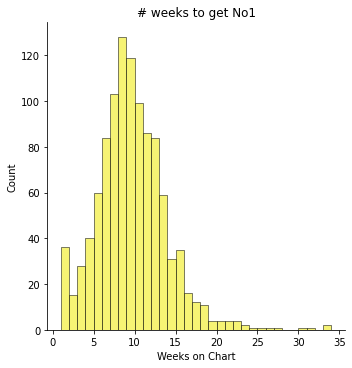

In [89]:
sns.displot(how_long.groupby('SongID')['Weeks on Chart'].min(), binwidth=1, color='#F3F046', linewidth=0.5)
plt.title('# weeks to get No1');

In [90]:
how_long_1960 = how_long[how_long['Decade'] == "1960's"].groupby('SongID')['Weeks on Chart'].min()
how_long_1970 = how_long[how_long['Decade'] == "1970's"].groupby('SongID')['Weeks on Chart'].min()
how_long_1980 = how_long[how_long['Decade'] == "1980's"].groupby('SongID')['Weeks on Chart'].min()
how_long_1990 = how_long[how_long['Decade'] == "1990's"].groupby('SongID')['Weeks on Chart'].min()
how_long_2000 = how_long[how_long['Decade'] == "2000's"].groupby('SongID')['Weeks on Chart'].min()
how_long_2010 = how_long[how_long['Decade'] == "2010's"].groupby('SongID')['Weeks on Chart'].min()

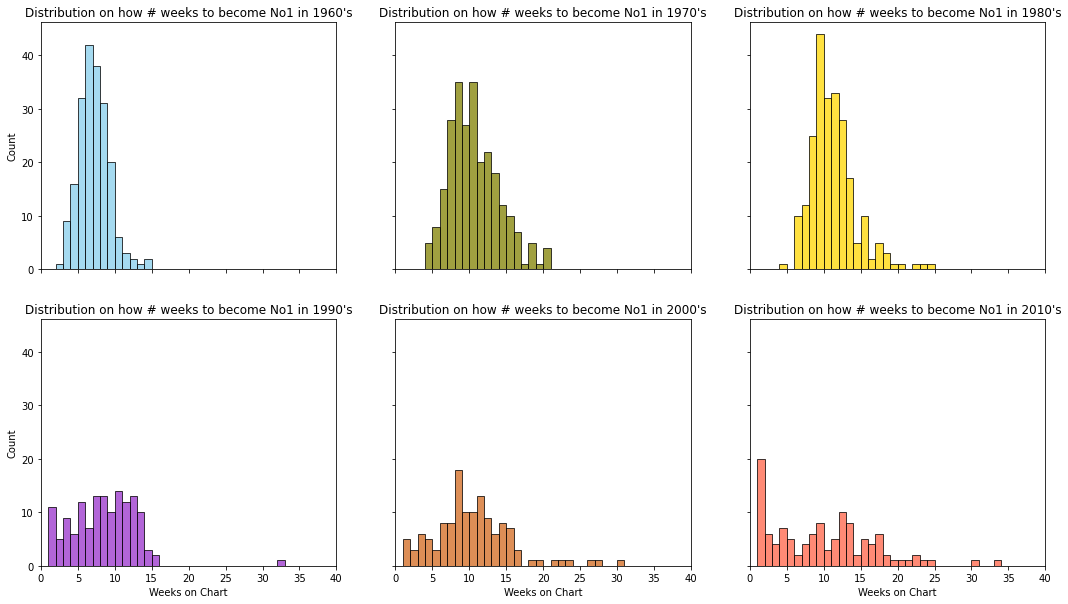

In [93]:
f, axes = plt.subplots(2, 3, figsize=(18,10), sharex=True, sharey=True)

plt.xlim(0,40)

ax1 = sns.histplot(how_long_1960 , color="skyblue", ax=axes[0, 0], binwidth=1)
ax2 = sns.histplot(how_long_1970 , color="olive", ax=axes[0, 1], binwidth=1)
ax3 = sns.histplot(how_long_1980 , color="gold", ax=axes[0, 2], binwidth=1)
ax4 = sns.histplot(how_long_1990 , color="darkorchid", ax=axes[1, 0], binwidth=1);
ax5 = sns.histplot(how_long_2000 , color="chocolate", ax=axes[1, 1], binwidth=1);
ax6 = sns.histplot(how_long_2010 , color="tomato", ax=axes[1, 2], binwidth=1);

ax1.set_title("Distribution on how # weeks to become No1 in 1960's")
ax2.set_title("Distribution on how # weeks to become No1 in 1970's")
ax3.set_title("Distribution on how # weeks to become No1 in 1980's")
ax4.set_title("Distribution on how # weeks to become No1 in 1990's")
ax5.set_title("Distribution on how # weeks to become No1 in 2000's")
ax6.set_title("Distribution on how # weeks to become No1 in 2010's");

While before you get No1 between 2 and 10 weeks, modern times statistics show it may take longer now to get No1 (a lot of songs get No1 after 10 weeks in the charts)

------------------------

For No1 songs, let's see how long in average they stayed in the Top100 and how long they stayed as No1

In [97]:
No1_week = pd.DataFrame(songsNo1.groupby(['SongID','Decade'], as_index=False)['Weeks on Chart'].max())

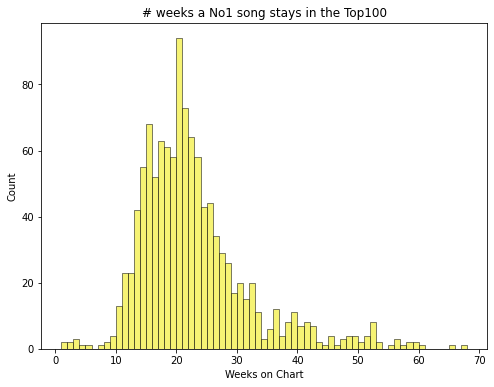

In [150]:
plt.figure(figsize=(8,6))
sns.histplot(No1_week['Weeks on Chart'], binwidth=1, color='#F3F046', linewidth=0.5)
plt.title('# weeks a No1 song stays in the Top100');

In [100]:
No1_week_1960 = No1_week[No1_week['Decade'] == "1960's"]
No1_week_1970 = No1_week[No1_week['Decade'] == "1970's"]
No1_week_1980 = No1_week[No1_week['Decade'] == "1980's"]
No1_week_1990 = No1_week[No1_week['Decade'] == "1990's"]
No1_week_2000 = No1_week[No1_week['Decade'] == "2000's"]
No1_week_2010 = No1_week[No1_week['Decade'] == "2010's"]

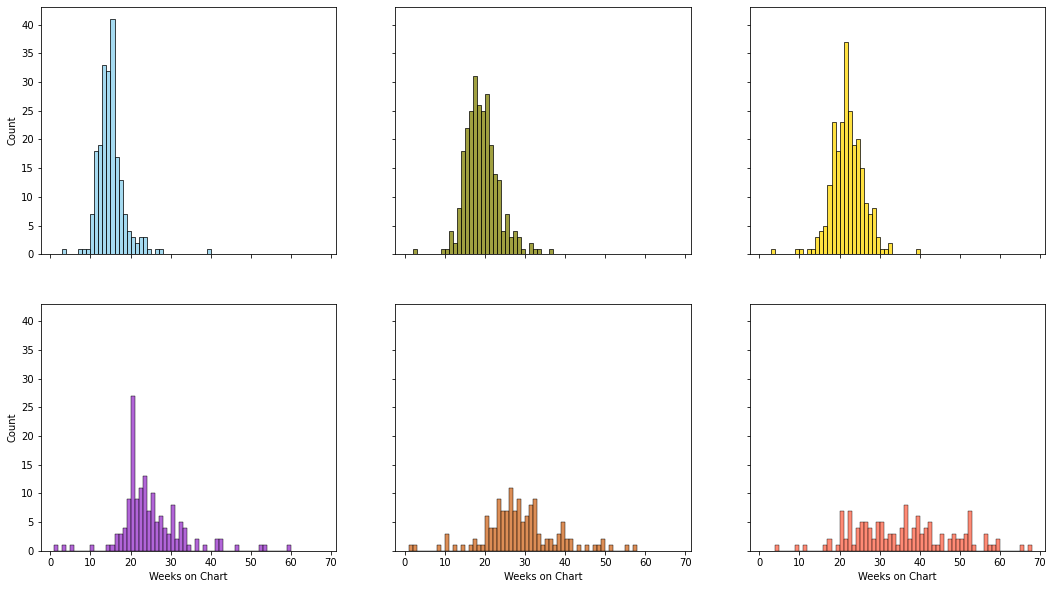

In [104]:
f, axes = plt.subplots(2, 3, figsize=(18,10), sharex=True, sharey=True)

sns.histplot(No1_week_1960["Weeks on Chart"] , color="skyblue", ax=axes[0, 0], binwidth=1)
sns.histplot(No1_week_1970["Weeks on Chart"] , color="olive", ax=axes[0, 1], binwidth=1)
sns.histplot(No1_week_1980["Weeks on Chart"] , color="gold", ax=axes[0, 2], binwidth=1)
sns.histplot(No1_week_1990["Weeks on Chart"] , color="darkorchid", ax=axes[1, 0], binwidth=1);
sns.histplot(No1_week_2000["Weeks on Chart"] , color="chocolate", ax=axes[1, 1], binwidth=1);
sns.histplot(No1_week_2010["Weeks on Chart"] , color="tomato", ax=axes[1, 2], binwidth=1);

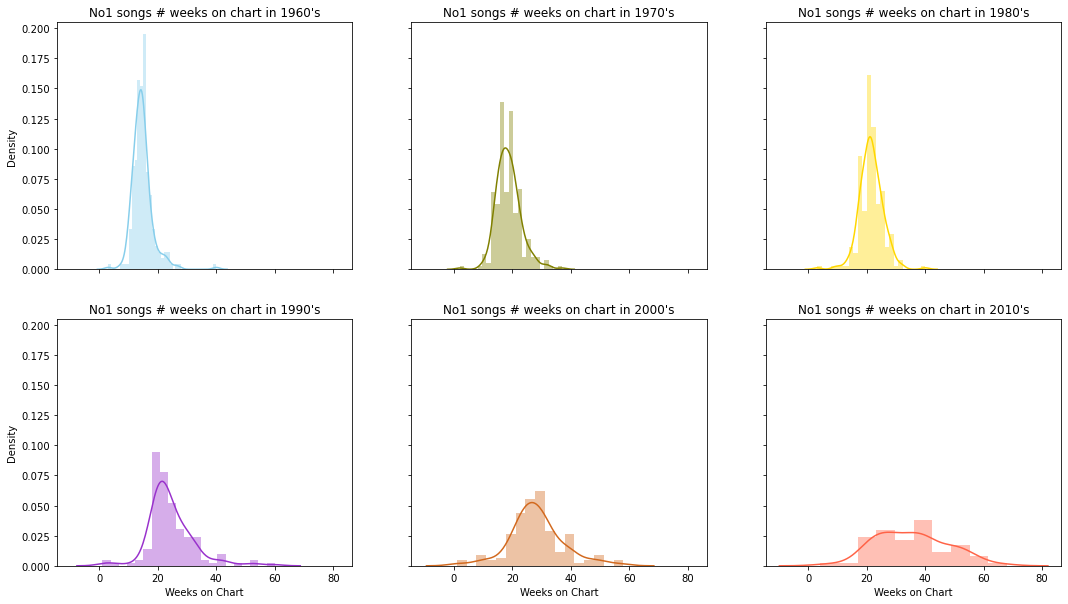

In [103]:
f, axes = plt.subplots(2, 3, figsize=(18,10), sharex=True, sharey=True)

ax1 = sns.distplot(No1_week_1960["Weeks on Chart"] , color="skyblue", ax=axes[0, 0])
ax2 = sns.distplot(No1_week_1970["Weeks on Chart"] , color="olive", ax=axes[0, 1])
ax3 = sns.distplot(No1_week_1980["Weeks on Chart"] , color="gold", ax=axes[0, 2])
ax4 = sns.distplot(No1_week_1990["Weeks on Chart"] , color="darkorchid", ax=axes[1, 0]);
ax5 = sns.distplot(No1_week_2000["Weeks on Chart"] , color="chocolate", ax=axes[1, 1]);
ax6 = sns.distplot(No1_week_2010["Weeks on Chart"] , color="tomato", ax=axes[1, 2]);

ax1.set_title("No1 songs # weeks on chart in 1960's")
ax2.set_title("No1 songs # weeks on chart in 1970's")
ax3.set_title("No1 songs # weeks on chart in 1980's")
ax4.set_title("No1 songs # weeks on chart in 1990's")
ax5.set_title("No1 songs # weeks on chart in 2000's")
ax6.set_title("No1 songs # weeks on chart in 2010's");

Interesting to see that No1 songs in the 2010's tend to stay much more on the charts than in the 60's. A strong trend there !

Let's see then per year, and in comparison with others top100 songs (the ones not making No1)

In [ ]:
week_average_no1 = pd.DataFrame(songsNo1.groupby(['Year','SongID'])['Weeks on Chart'].max())
week_average_no1.columns = ['Weeks on chart max']
week_average_no1 = week_average_no1.reset_index()

In [151]:
week_average_no1 = pd.DataFrame(week_average_no1.groupby('Year')['Weeks on chart max'].mean())
week_average_no1.tail()

,Weeks on chart max
Year,
2015,28.600000
2016,29.916667
2017,31.894737
2018,31.136364
2019,34.210526


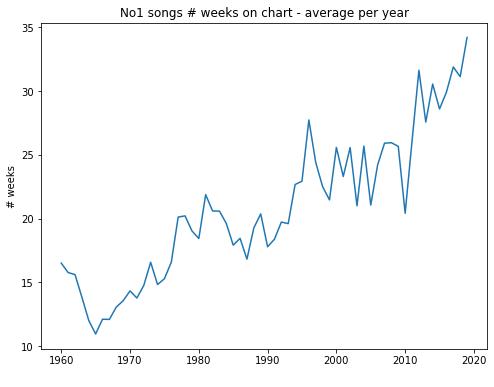

In [153]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Year", y="Weeks on chart max", data=week_average_no1)
plt.xlabel(" ")
plt.ylabel("# weeks")
plt.title("No1 songs # weeks on chart - average per year");

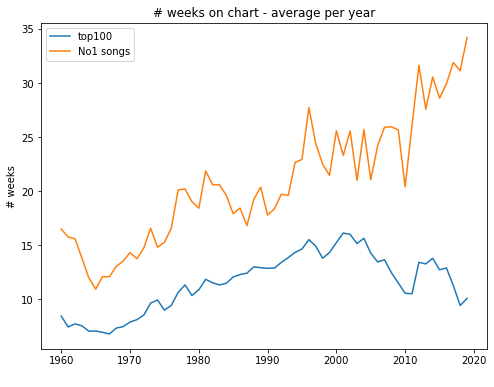

In [155]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Year", y="Weeks on chart max", data=week_average)
sns.lineplot(x="Year", y="Weeks on chart max", data=week_average_no1)
plt.xlabel(" ")
plt.ylabel("# weeks")
plt.title("# weeks on chart - average per year");
plt.legend(['top100', 'No1 songs']);

-------------------

Same study but let's check how long songs stay as No1

In [107]:
songsNo1[songsNo1['Week Position'] == 1].groupby('Decade')['SongID'].value_counts()

Decade  SongID                                                      
1960's  Are You Lonesome To-night?Elvis Presley With The Jordanaires    12
        In The Year 2525Zager & Evans                                   12
        Get BackThe Beatles With Billy Preston                          10
        It's Now Or NeverElvis Presley With The Jordanaires             10
        Sugar ShackJimmy Gilmer And The Fireballs                       10
                                                                        ..
2010's  That's What I LikeBruno Mars                                     1
        We R Who We RKe$ha                                               1
        What Do You Mean?Justin Bieber                                   1
        What's My Name?Rihanna Featuring Drake                           1
        When I Was Your ManBruno Mars                                    1
Name: SongID, Length: 1075, dtype: int64

In [108]:
No1_weekNo1 = songsNo1[songsNo1['Week Position'] == 1]
No1_weekNo1

,SongID,Previous Week Position,Week Position,Weeks on Chart,Decade,Year
0,Candle In The Wind 1997/Something About The Wa...,NaN,1,1,1990's,1997
37,Candle In The Wind 1997/Something About The Wa...,1.0,1,12,1990's,1997
115,Candle In The Wind 1997/Something About The Wa...,1.0,1,9,1990's,1997
116,Bennie And The JetsElton John,2.0,1,9,1970's,1974
117,Crocodile RockElton John,3.0,1,9,1970's,1973
...,...,...,...,...,...,...
336106,You Don't Have To Be A Star (To Be In My Show)...,2.0,1,18,1970's,1977
337691,The HustleVan McCoy And The Soul City Symphony,2.0,1,15,1970's,1975
338106,Then Came YouDionne Warwicke & Spinners,2.0,1,14,1970's,1974
338700,Whatever Gets You Thru The NightJohn Lennon Wi...,3.0,1,8,1970's,1974


In [109]:
No1_weekNo1_1960 = No1_weekNo1[No1_weekNo1['Decade'] == "1960's"]
No1_weekNo1_1970 = No1_weekNo1[No1_weekNo1['Decade'] == "1970's"]
No1_weekNo1_1980 = No1_weekNo1[No1_weekNo1['Decade'] == "1980's"]
No1_weekNo1_1990 = No1_weekNo1[No1_weekNo1['Decade'] == "1990's"]
No1_weekNo1_2000 = No1_weekNo1[No1_weekNo1['Decade'] == "2000's"]
No1_weekNo1_2010 = No1_weekNo1[No1_weekNo1['Decade'] == "2010's"]

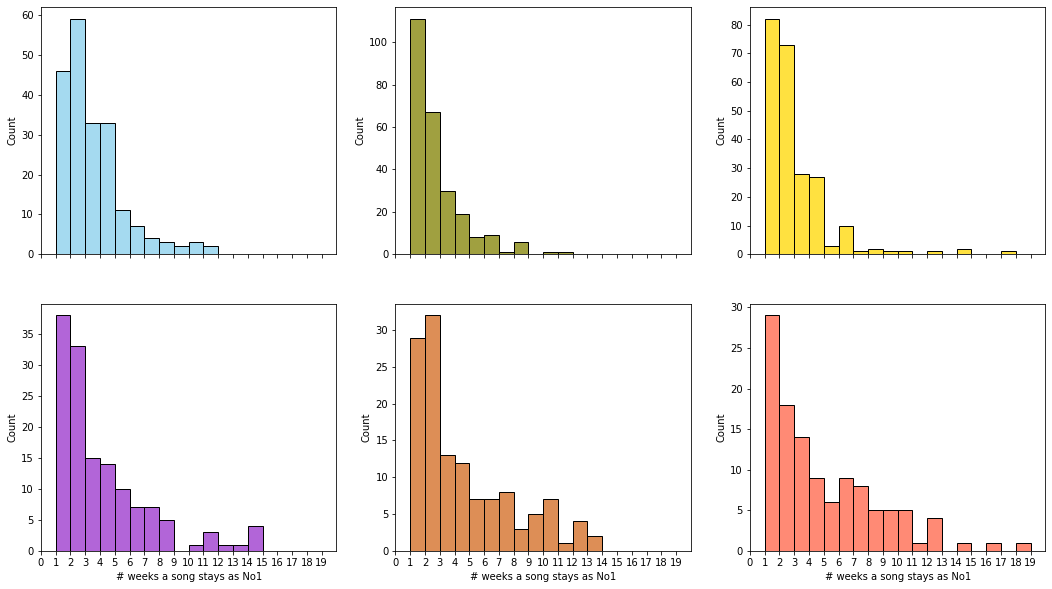

In [111]:
f, axes = plt.subplots(2, 3, figsize=(18,10), sharex=True)

plt.xlim(0,20)

ax1 = sns.histplot(No1_weekNo1_1960['SongID'].value_counts() , color="skyblue", ax=axes[0, 0], binwidth=1)
ax2 = sns.histplot(No1_weekNo1_1970['SongID'].value_counts() , color="olive", ax=axes[0, 1], binwidth=1)
ax3 = sns.histplot(No1_weekNo1_1980['SongID'].value_counts() , color="gold", ax=axes[0, 2], binwidth=1)
ax4 = sns.histplot(No1_weekNo1_1990['SongID'].value_counts() , color="darkorchid", ax=axes[1, 0], binwidth=1);
ax5 = sns.histplot(No1_weekNo1_2000['SongID'].value_counts() , color="chocolate", ax=axes[1, 1], binwidth=1);
ax6 = sns.histplot(No1_weekNo1_2010['SongID'].value_counts() , color="tomato", ax=axes[1, 2], binwidth=1);

ax1.set_xlabel("# weeks a song stays as No1")
ax2.set_xlabel("# weeks a song stays as No1")
ax3.set_xlabel("# weeks a song stays as No1")
ax4.set_xlabel("# weeks a song stays as No1")
ax5.set_xlabel("# weeks a song stays as No1")
ax6.set_xlabel("# weeks a song stays as No1");

ax1.set_xticks(np.arange(20));


2010's No1 songs tend to stay much longer as No1 than before. But no strong trend there.

-------------------------------

## Let's check the Spotify file

In [112]:
spotify= pd.read_csv('spotify_data.csv')

In [113]:
spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


Like for the other dataset, let's create the decades, remove everything before 1960 and 2020 songs.

In [117]:
spotify['decade'] = spotify['year'].apply(decade)

In [118]:
spotify.drop(spotify[spotify['decade'] == "1950's"].index, inplace=True)

In [119]:
spotify.drop(spotify[spotify['year'] == 2020].index, inplace=True)

In [120]:
count_name = spotify[['decade','name']].drop_duplicates()

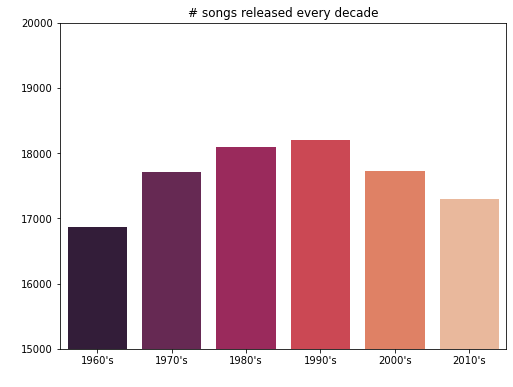

In [121]:
plt.figure(figsize=(8,6))
sns.countplot(x='decade', data=count_name, palette='rocket')
plt.xlabel(' ')
plt.ylabel(' ')
plt.ylim(15000,20000)
plt.title('# songs released every decade');

Interesting to see here that the numbers of songs created is more or less the same every decade !

------------------------

Let's calculate the ratio of songs entering Top100

In [125]:
song_per_decade = pd.DataFrame(charts.groupby('Decade')['SongID'].nunique())
name_per_decade = pd.DataFrame(spotify.groupby('decade')['name'].nunique())

In [126]:
name_per_decade['RatioTop'] = song_per_decade['SongID'] / name_per_decade['name']
name_per_decade

,name,RatioTop
decade,,
1960's,16862,0.412407
1970's,17711,0.305121
1980's,18095,0.233269
1990's,18196,0.193779
2000's,17729,0.198319
2010's,17295,0.265742


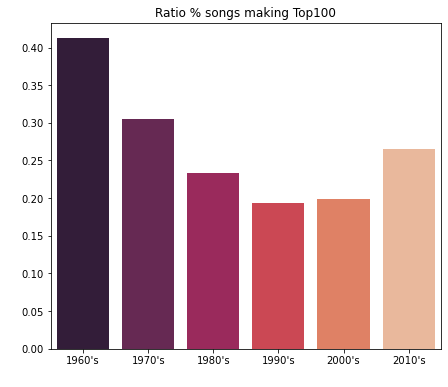

In [127]:
plt.figure(figsize=(7,6));
sns.barplot(x=name_per_decade.index, y=name_per_decade['RatioTop'], data=name_per_decade, palette="rocket");
plt.title("Ratio % songs making Top100")
plt.xlabel(" ")
plt.ylabel(" ");

Paradoxically, it seems that the last decade is more open than previous ones. Almost 30% of songs entered Top100 in 2010's

----------------------

From a research done parallely and not present there, I've seen that the Charts dataset and Spotify dataset have 12000 songs in common. Let's merge them to see the danceability, duration and tempo of Top100 songs per year or decade

In [128]:
spotify['artists'] = spotify['artists'].str.replace("[","")
spotify['artists'] = spotify['artists'].str.replace("'","")
spotify['artists'] = spotify['artists'].str.replace("]","")

In [129]:
spotify[['singer','featured singer']] = spotify['artists'].str.split(',',expand=True).iloc[:,:2]

In [130]:
spotify["concatenate"] = spotify["name"] + spotify["singer"]

In [131]:
charts['concatenate'] = charts['Song'] + charts['Singer']

In [132]:
charts = pd.merge(charts, spotify[['concatenate','danceability','duration_ms','tempo']], on='concatenate', how='left')

In [133]:
charts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385635 entries, 0 to 385634
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   WeekID                  385635 non-null  datetime64[ns]
 1   Song                    385635 non-null  object        
 2   SongID                  385635 non-null  object        
 3   Singer                  385635 non-null  object        
 4   Singer ID               385635 non-null  int64         
 5   Collaboration           385635 non-null  object        
 6   Featured Singers        31970 non-null   object        
 7   Peak Position           385635 non-null  int64         
 8   Week Position           385635 non-null  int64         
 9   Previous Week Position  350225 non-null  float64       
 10  Weeks on Chart          385635 non-null  int64         
 11  Year                    385635 non-null  int64         
 12  Decade                  385635

In [134]:
danceability_year = pd.merge(charts.groupby('Year')['danceability'].mean(), 
                     spotify.groupby('year')['danceability'].mean(),
                     left_index=True, right_index=True,
                     suffixes=['_top100','_all'])

duration_year = pd.merge(charts.groupby('Year')['duration_ms'].mean(), 
                     spotify.groupby('year')['duration_ms'].mean(),
                     left_index=True, right_index=True,
                     suffixes=['_top100','_all'])

tempo_year = pd.merge(charts.groupby('Year')['tempo'].mean(), 
                     spotify.groupby('year')['tempo'].mean(),
                     left_index=True, right_index=True,
                     suffixes=['_top100','_all'])


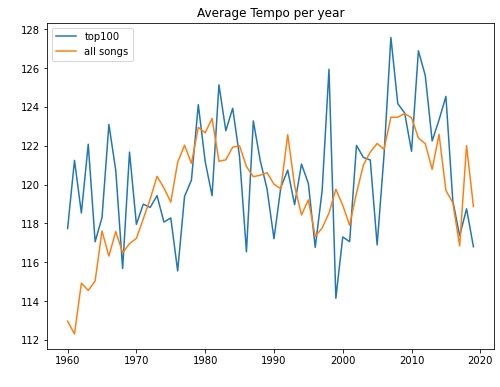

In [135]:
#tempo per year
plt.figure(figsize=(8,6))
sns.lineplot(x=tempo_year.index, y='tempo_top100', data=tempo_year)
sns.lineplot(x=tempo_year.index, y='tempo_all', data=tempo_year)
plt.ylabel(' ')
plt.xlabel(' ')
plt.title("Average Tempo per year")
plt.legend(['top100', 'all songs']);

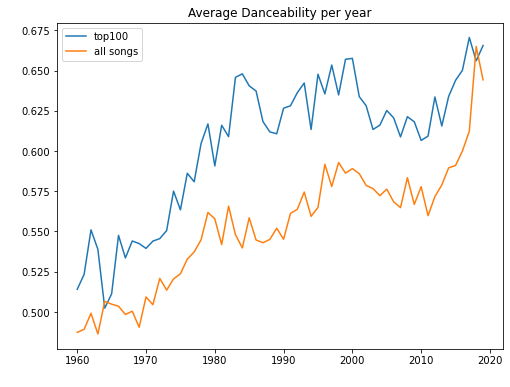

In [136]:
#danceability per year
plt.figure(figsize=(8,6))
sns.lineplot(x=danceability_year.index, y='danceability_top100', data=danceability_year)
sns.lineplot(x=danceability_year.index, y='danceability_all', data=danceability_year)
plt.ylabel(' ')
plt.xlabel(' ')
plt.title("Average Danceability per year")
plt.legend(['top100', 'all songs']);

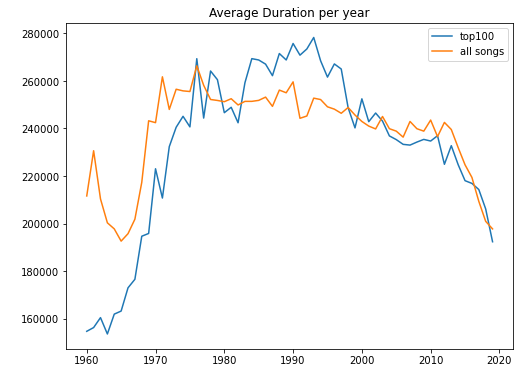

In [137]:
#duration per decade
plt.figure(figsize=(8,6))
sns.lineplot(x=duration_year.index, y='duration_ms_top100', data=duration_year)
sns.lineplot(x=duration_year.index, y='duration_ms_all', data=duration_year)
plt.ylabel(' ')
plt.xlabel(' ')
plt.title("Average Duration per year")
plt.legend(['top100', 'all songs']);

Nothing very interesting there (that was done more for the fun), except maybe the danceability concept. Top100 songs seem to be more danceable ! Except in very last years, but maybe the merge between the two datasets is not covering well this period.

-----------------

Again for fun, let's design a correlation in Spotify dataset

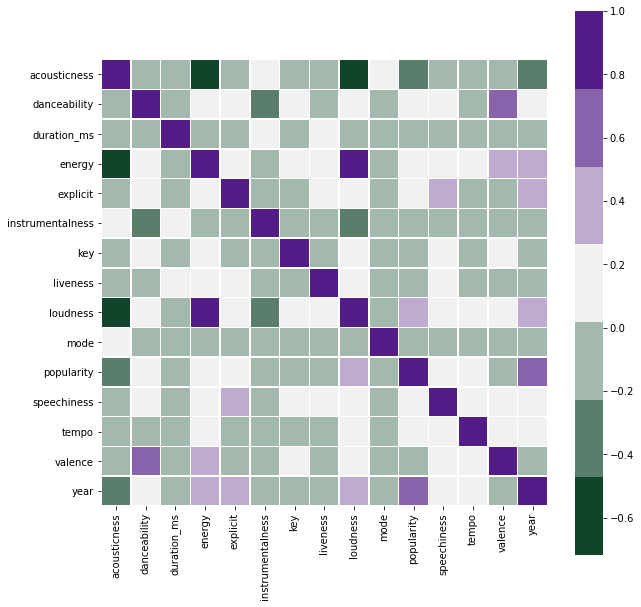

In [138]:
spotify.corr()
plt.figure(figsize=(10,10))
sns.heatmap(spotify.corr(),
           cmap=sns.diverging_palette(145,280,s=85,l=25,n=7),
           linewidths=0.5,
           square=True);

Almost no strong correlation !

Who made more songs in music history ?

In [145]:
spotify.groupby('artists')['name'].nunique().sort_values(ascending=False).head(20)

artists
Bob Dylan                   512
The Beach Boys              442
Elvis Presley               360
The Rolling Stones          351
Queen                       348
Frank Sinatra               339
The Beatles                 331
Johnny Cash                 321
Fleetwood Mac               304
Led Zeppelin                269
Grateful Dead               243
Nina Simone                 228
Vicente Fernández           222
Bob Marley & The Wailers    218
The Who                     215
David Bowie                 207
Elton John                  205
The Kinks                   205
Metallica                   204
Stevie Wonder               201
Name: name, dtype: int64

## This conclude this quick journey into the US Billboard 100 since 1960. It seems like current time gives more chance to songs to enter top100 but main challenge is to become No1 since it gets rewarded (in terms of # weeks in the charts) much more than before.